In [19]:
## import python data analysis library 
import pandas as pd

## import data visualization library matplotlib and seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, FuncFormatter
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from matplotlib import rc
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset, zoomed_inset_axes)
import matplotlib.cm as cm
import numpy as np
import matplotlib.patches as mpatches

## import module to read files
import mimetypes
import urllib
import os

# import google colab to use google colab as editor
# if you use other editor, do not need to import google.colab here
from google.colab import drive	
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
## setting path
# get current path
path_current = os.getcwd()
# the path is where the dataset saved
path = path_current + '/drive/My Drive/Visualization/Data/' 
# the "path_img" is the position where final image will be saved
path_img = path_current + '/drive/My Drive/Visualization/Images/'

In [21]:
class Bubble:
  # read data
  def read_file(self,file):
    file_url = urllib.request.pathname2url(file) # try catch
    ftype = mimetypes.guess_type(file_url, strict=True)[0]
    ## read data file according to its formate, default includes three types of files: csv/excel/text
    # read csv format data 
    if 'csv' in ftype:
      # usecols: return a subset of the columns, here choose one column to use in the line chart
      data = pd.read_csv(path+file)
    # read excel format data 
    elif 'sheet' in ftype:
      data = pd.read_excel(path+file)
    # read text format data from 
    elif ftype == 'text/plain':
      data = pd.read_csv(path+file, sep="\t")
    else:
      print("File type cannot find!")
    return data


  # file: file name of your data source, it support csv/excel,text. for example: 'new_file.csv'
  # x_col_name: The X column name 
  # y_col_name: The Y column name
  # bubble_col : The bubble values column
  # x_label: x axis label 
  # y_label: y axis label
  # legend_label: legend labels column names
  # legend title: customize legend lables title
  # plot_title: The title of the plot 
  # output_name : output file name 
  def bubble_plot(self, file,  x_col_name,  y_col_name,bubble_col, x_label, y_label,legend_label, legend_title, plot_title,output_name, **kwargs):
    conf={ 'plotwidth':10,#weight
                        'plotheight':8, #height
                        'my_font':'DejaVu Sans',
                        'backgrid':True,
                        'isframe':True,
                        'linewidth':2,
                        'gridlinewidth':0.5,
                        'gridline_style': '--',
                        'gridline_color':'gray',
                        'gridline_alpha':0.8,
                        'labeltext_size':20,
                        'labelpad':10,
                        'legend_size':10,
                        'legend_loc':'upper right', 
                        'title_pad':10,
                        'title_size':15,
                        'bubble_scale':50,
                        'title_loc':'center',
                        'xtrick_fontsize':15,
                        'ytrick_fontsize':15,
                        'bubble_marker':'o',
                        'alpha' : 0.8,
                        'bubble_colors' : ['#0173B2', '#DE8F05', '#029E73', '#ECE133', 
                      '#CC78BC', '#8E5638', '#FBAFE4', '#949494', 
                      '#56B4E9', '#D55E00'],
                        }


    # when new configuraton is set, update the original one
    conf.update(kwargs)  
    ## create figure and set figure size  
    fig, ax = plt.subplots(figsize = (conf['plotwidth'], conf['plotheight']))
    ## background grid setting
    if conf['backgrid'] == True:
      ax.grid(linestyle=conf['gridline_style'], linewidth=conf['gridlinewidth'], color=conf['gridline_color'], alpha=conf['gridline_alpha'])
    
    ## x, y axis setting
    # fontsize: x, y title size
    ax.set_xlabel(x_label, fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
    ax.set_ylabel(y_label, fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
        
    # read file 
    data = self.read_file(file)


    # start plot

    # origin bubble data
    bubble_list = list(data[bubble_col])
      
      
    # scale the bubble size become smaller/bigger depend on user input, the inital setting is 50
    bubble_scale = []
    for i in range(len(bubble_list)):
      bubble_scale.append(bubble_list[i]/conf['bubble_scale'])

    # bubble colors
    # count the number of x column values and match with our bubble color list
    num_index = len(data[x_col_name])
    colors = conf['bubble_colors'][:num_index]
      
    # bubble chart
    scatter = ax.scatter(x = x_col_name,
                y = y_col_name,
                c = colors,
                s = bubble_scale,
                marker = conf['bubble_marker'],
                alpha = conf['alpha'],
                data = data,
                label = colors)
      
    # add legend 
    legend_list = list(data[legend_label])


    # match the color of the label
    l = []
    for i in range(0,num_index):
      l.append(mpatches.Patch(color=colors[i],alpha=conf['alpha'],label=legend_list[i]))
      # legend
    legend1 = ax.legend(handles=l,title = legend_title)

    # add the second legend
    ax.add_artist(legend1)
    
    # create the handles and labels for the bubble sizes legend
    handles,labels = scatter.legend_elements(prop="sizes", alpha=conf['alpha'])

    # scale back the origin data 
    kw = dict(prop="sizes",func=lambda s: s*conf['bubble_scale'])
    
    # bubble sizes legend add into the plot 
    legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="center right", title="Sizes")

    #legend2 = ax.legend(handles, labels, loc='lower left',title="Sizes")

    # xtricks and yticks font size
    plt.xticks(fontsize=conf['xtrick_fontsize'])
    plt.yticks(fontsize=conf['ytrick_fontsize'])
      
    # title
    plt.title(plot_title, fontsize=conf['title_size'])
    
    # save the image 
    plt.savefig(path_img+output_name)
    plt.show()




  
  # file: file name of your data source, it support csv/excel,text. for example: 'new_file.csv'
  # x_col_name: The X column name 
  # y_col_name: The Y column name
  # bubble_col : The bubble values column
  # category_col: The category column of bubble 
  # x_label: x axis label 
  # y_label: y axis label
  # legend_label: legend labels column names
  # legend title: customize legend lables title
  # plot_title: The title of the plot 
  # output_name : output file name
  
  def bubble_category(self, file,x_col_name, y_col_name,bubble_col, x_label, y_label,category_col,plot_title, output_name,**kwargs):
    conf={ 'plotwidth':10,#weight
                        'plotheight':8, #height
                        'my_font':'DejaVu Sans',
                        'backgrid':True,
                        'isframe':True,
                        'linewidth':2,
                        'gridlinewidth':0.5,
                        'gridline_style': '--',
                        'gridline_color':'gray',
                        'gridline_alpha':0.8,
                        'labeltext_size':20,
                        'labelpad':10,
                        'legend_size':10,
                        'legend_loc':'upper right', 
                        'title_pad':10,
                        'title_size':15,
                        'bubble_scale':50,
                        'title_loc':'center',
                        'xtrick_fontsize':15,
                        'ytrick_fontsize':15,
                        'bubble_marker':'o',
                        'alpha' : 0.8,
                        'bubble_colors' : ['#0173B2', '#DE8F05', '#029E73', '#ECE133', 
                      '#CC78BC', '#8E5638', '#FBAFE4', '#949494', 
                      '#56B4E9', '#D55E00'],
                        }


    # when new configuraton is set, update the original one
    conf.update(kwargs)  
    ## create figure and set figure size  
    fig, ax = plt.subplots(figsize = (conf['plotwidth'], conf['plotheight']))
    ## background grid setting
    if conf['backgrid'] == True:
      ax.grid(linestyle=conf['gridline_style'], linewidth=conf['gridlinewidth'], color=conf['gridline_color'], alpha=conf['gridline_alpha'])
    
    ## x, y axis setting
    # fontsize: x, y title size
    ax.set_xlabel(x_label, fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
    ax.set_ylabel(y_label, fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
        
    # read file 
    data = self.read_file(file)

    # origin bubble data
    bubble_list = list(data[bubble_col])
    
    # scale the bubble size become smaller 
    bubble_scale = []
    for i in range(len(bubble_list)):
      bubble_scale.append(bubble_list[i]/conf['bubble_scale'])

    map_color = []
    # create the list to get the category unique value
    # Example: ['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']
    category_list = data[category_col].unique()
    
    # map each category item to one color 
    # {'Asia': 'r', 'Europe': 'b', 'Africa': 'y','Americas':'g','Oceania':'c'}
    map_color = dict(zip(category_list,conf['bubble_colors'][:len(category_list)]))
    
    # color for each item
    colors = data[category_col].map(map_color)

    # plot the bubble chart
    scatter = ax.scatter(data[x_col_name],
                         data[y_col_name],
                         s=bubble_scale,
                         color=colors,
                         label=colors,
                         alpha=conf['alpha'],
                         edgecolors='grey')
    
    
     # create the mptaches list to for legend 
    match_color = []
    for key,value in map_color.items():
      match_color.append(mpatches.Patch(color=value, label=key))
    # crate the legend
    ax.legend(handles=match_color)



     # xtricks and yticks font size
    plt.xticks(fontsize=conf['xtrick_fontsize'])
    plt.yticks(fontsize=conf['ytrick_fontsize'])
    
    # title
    plt.title(plot_title, fontsize=conf['title_size'])
    
    # save the plot 
    plt.savefig(path_img + output_name)


  # file: file name of your data source, it support csv/excel,text. for example: 'new_file.csv'
  # x_col_name: The X column name 
  # y_col_name: The Y column name
  # bubble_col : The bubble values column
  # x_label: x axis label 
  # y_label: y axis label
  # plot_title: The title of the plot 
  # output_name : output file name
  def bubble_colormap(self, file,  x_col_name,y_col_name,bubble_col, x_label, y_label,plot_title, output_name,**kwargs):
    conf={ 'plotwidth':10,#weight
                        'plotheight':8, #height
                        'my_font':'DejaVu Sans',
                        'backgrid':True,
                        'isframe':True,
                        'linewidth':2,
                        'gridlinewidth':0.5,
                        'gridline_style': '--',
                        'gridline_color':'gray',
                        'gridline_alpha':0.8,
                        'labeltext_size':20,
                        'labelpad':10,
                        'legend_size':10,
                        'legend_loc':'upper right', 
                        'title_pad':10,
                        'title_size':15,
                        'bubble_scale':50,
                        'title_loc':'center',
                        'xtrick_fontsize':15,
                        'ytrick_fontsize':15,
                        'bubble_marker':'o',
                        'alpha' : 0.8,
                        'bubble_colors' : ['#0173B2', '#DE8F05', '#029E73', '#ECE133', 
                      '#CC78BC', '#8E5638', '#FBAFE4', '#949494', 
                      '#56B4E9', '#D55E00'],
                        }


    # when new configuraton is set, update the original one
    conf.update(kwargs)  
    ## create figure and set figure size  
    fig, ax = plt.subplots(figsize = (conf['plotwidth'], conf['plotheight']))
    ## background grid setting
    if conf['backgrid'] == True:
      ax.grid(linestyle=conf['gridline_style'], linewidth=conf['gridlinewidth'], color=conf['gridline_color'], alpha=conf['gridline_alpha'])
    
    ## x, y axis setting
    # fontsize: x, y title size
    ax.set_xlabel(x_label, fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
    ax.set_ylabel(y_label, fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
        
    # read file 
    data = self.read_file(file)

    # bubble colors
    num_index = len(data[x_col_name])
    colors = conf['bubble_colors'][:num_index]
    
    # bubble chart
    plt.scatter(x = x_col_name,
               y = y_col_name,
               c = bubble_col,
               s = 400,
               cmap='Greens',
               marker = conf['bubble_marker'],
               alpha = conf['alpha'],
               data = data)
    

    plt.colorbar(ax=ax)
    # xtricks and yticks font size
    plt.xticks(fontsize=conf['xtrick_fontsize'])
    plt.yticks(fontsize=conf['ytrick_fontsize'])
    
    # title
    plt.title(plot_title, fontsize=conf['title_size'])
    
    # save the plot
    plt.savefig(path_img+output_name)
    plt.show()






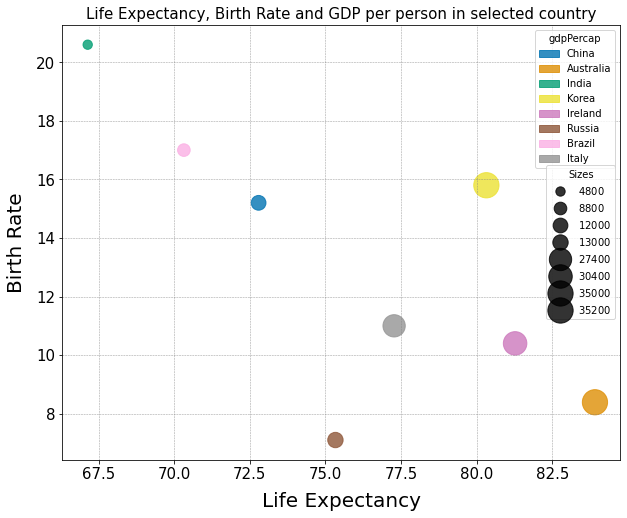

In [22]:
b1=Bubble()

  # file: file name of your data source, it support csv/excel,text. for example: 'new_file.csv'
  # x_col_name: The X column name 
  # y_col_name: The Y column name
  # bubble_col : The bubble values column
  # x_label: x axis label 
  # y_label: y axis label
  # legend_label: legend labels column names
  # legend title: customize legend lables title
  # plot_title: The title of the plot 
  # output_name : output file name 
b1.bubble_plot(file='bubble_gdp.xlsx',x_col_name='Life Expectancy',y_col_name='Birth Rate',bubble_col = 'GDP', x_label='Life Expectancy',y_label='Birth Rate',legend_label='Name',legend_title='gdpPercap',
               plot_title='Life Expectancy, Birth Rate and GDP per person in selected country', output_name='gdp.pdf',bubble_scale=55)

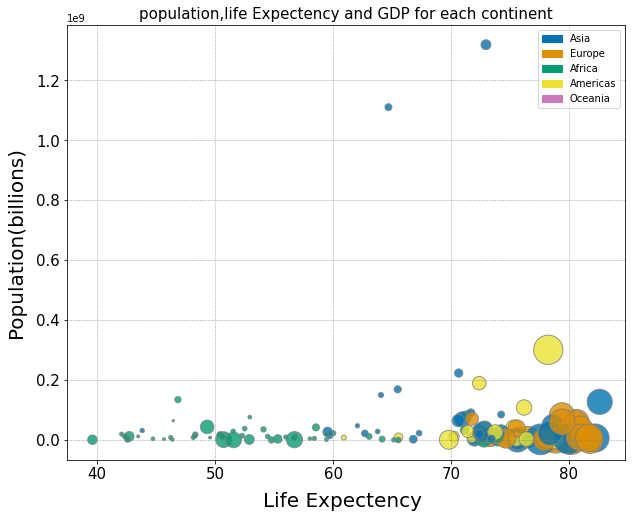

In [23]:
b3 = Bubble()

  # file: file name of your data source, it support csv/excel,text. for example: 'new_file.csv'
  # x_col_name: The X column name 
  # y_col_name: The Y column name
  # bubble_col : The bubble values column
  # category_col: The category column of bubble 
  # x_label: x axis label 
  # y_label: y axis label
  # legend_label: legend labels column names
  # legend title: customize legend lables title
  # plot_title: The title of the plot 
  # output_name : output file name
b3.bubble_category(file='gdp_continent.csv',x_col_name='lifeExp',y_col_name='pop',bubble_col = 'gdpPercap',category_col='continent', x_label='Life Expectency ',y_label='Population(billions)',paper_type='single', 
               plot_title='population,life Expectency and GDP for each continent', output_name='gdp_continent.pdf')


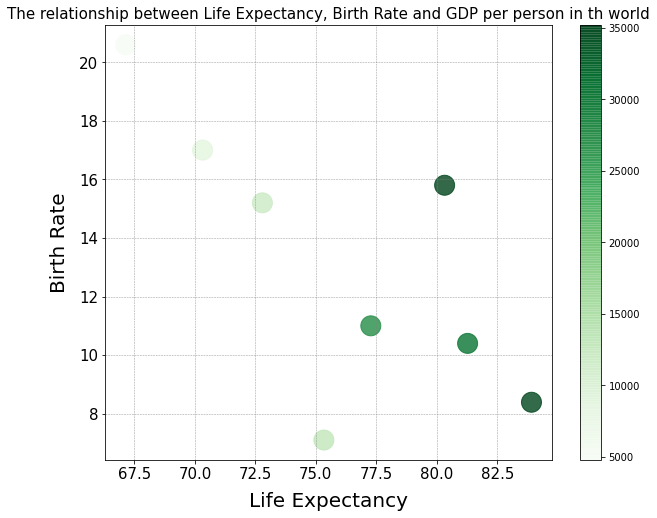

In [24]:
b4=Bubble()

  # file: file name of your data source, it support csv/excel,text. for example: 'new_file.csv'
  # x_col_name: The X column name 
  # y_col_name: The Y column name
  # bubble_col : The bubble values column
  # x_label: x axis label 
  # y_label: y axis label
  # plot_title: The title of the plot 
  # output_name : output file name
b4.bubble_colormap(file='bubble_gdp.xlsx',x_col_name='Life Expectancy',y_col_name='Birth Rate',bubble_col = 'GDP', x_label='Life Expectancy',y_label='Birth Rate',paper_type='single',legend_label='Name',legend_title='gdpPercap',
               plot_title='The relationship between Life Expectancy, Birth Rate and GDP per person in th world', output_name='gdp.pdf')